In [54]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def makeColorMap(g):
    color_map=[]
    for node in g.nodes(data=True):
        if node[1]['activation']==0:
            color_map.append('red')
        else:
            if node[1]['activation']==1:
                color_map.append('green')
            else:
                color_map.append('blue')
    return color_map


def drawLattice(g):
    pos = dict( (n, n) for n in g.nodes() )
    nx.draw(g, pos=pos, node_color = makeColorMap(g), labels=pos)    

def drawGraph(g):
    nx.draw(g, node_color = makeColorMap(g))    

    
def getProbability(g,prob,v,w):
    node=list(g.nodes(data=True))
    return node[v][1]['pagerank']*len(list(nx.neighbors(g,v)))


def activate(g,w,status,times,time):
    ww={w : 1}
    status.update(ww)
    nx.set_node_attributes(g, status, 'activation')
    tt={w : time}
    times.update(tt)
    nx.set_node_attributes(g, times, 'timeout')
    
def checkStatus(g,t,status): 
    res=[]
    for node in g.nodes(data=True):
        if node[1]['timeout']<=t and node[1]['activation']==1:
            res.append(node[0])
            w={node[0] : 2}
            status.update(w)
    nx.set_node_attributes(g, status, 'activation')
    return res        
    

def independantCascadeModel(g,initialNodes,maxrounds=99999,prob=0.5,time=0):
    if time==0:
        time=maxrounds
    status={}
    times={}
    for v in g.nodes:
        t={ v : maxrounds}
        if v in initialNodes:
            w={v : 1}
        else:
            w={v : 0}
        status.update(w)
        times.update(t)
    nx.set_node_attributes(g, status, 'activation')
    nx.set_node_attributes(g, times, 'timeout')
    i=0;
    a=[]
    lost=[[]]
    a_all=[];
    a.append(initialNodes);
    while a[i]:
        lostnew=checkStatus(g,i,status)
        lost.append(lostnew)
        #print(lost)
        anew=[]
        for v in a[i]:
            for w in nx.neighbors(g,v):
                if w not in a_all:
                    p=random.random()
                    if p<=getProbability(g,prob,v,w):
                        if time == 0:
                            activate(g,w,status,times,maxrounds)
                        else:
                            activate(g,w,status,times,i+time)    
                        anew.append(w)
                        a_all.append(w)
        i+=1
        if i>maxrounds:
            return a
        a.append(anew)
    return (a,lost);

def rowSum(m, row):
    total = 0
    for col in range(len(m[row])):
        total += m[row][col]
    return total


def pagerank(g,v):
    alpha=0.85
    n=len(v)    
    m=nx.to_numpy_array(g)
    for i in range (len(m)):
        t=rowSum(m,i)
        if t!=0:
            m[i]=m[i]/t        
    a=np.transpose(m)
    one=[]
    for i in range(len(v)):
        one.append(1)
    for i in range(100):
        v2=[(1-alpha)/n * i for i in one]+alpha*a@v
        v=v2
    return v

def addPagerank(g):
    sv=[1]
    for i in range(len(g.nodes)-1):
        sv.append(0)
    pr=pagerank(g,sv)
    prd={}
    for v,r in zip(list(g.nodes),pr):
        w={v : r}
        prd.update(w)
    nx.set_node_attributes(g,prd,'pagerank')


def showDiffusion(vl,g):
    v=vl[0]
    v2=vl[1]
    result=[]
    result2=[]
    result3=[]
    for i in range(len(v)):
        if i==0:
            result.append(len(v[0])-len(v2[0]))
            result2.append(len(v2[0]))
            result3.append(len(list(g.nodes()))-result[0])
        else:
            result.append(result[i-1]+len(v[i])-len(v2[i]))
            result2.append(result2[i-1]+len(v2[i]))
            result3.append(len(list(g.nodes()))-result[i]-result2[i])

    plt.plot(result)
    plt.plot(result2)
    plt.plot(result3)
    plt.show()

def getHubs(g,n):
    hubs=[]
    for v in g.nodes():
        if len(list(nx.neighbors(g,v)))>=n:
            hubs.append(v)
    return hubs

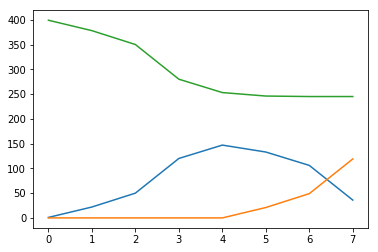

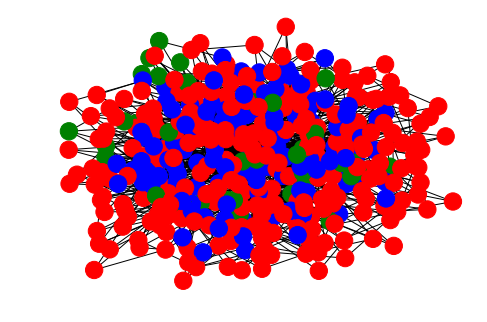

In [55]:
pag=nx.barabasi_albert_graph(400, 2, seed=None)
addPagerank(pag)
getProbability(pag,0.5,list(pag.nodes())[0],list(pag.nodes())[1])
#initialNodes=getHubs(pag,20)
initialNodes=[list(pag.nodes)[0]]
res=independantCascadeModel(pag,initialNodes,maxrounds=99999,prob=0.4,time=4)
showDiffusion(res,pag)
drawGraph(pag)
#print(pag.nodes(data=True))